# Math 134A Week 1

## Compound Interest
Let $A$ be the **principal**, which is the original amount of money we saved in the bank. Let $r$ be the **annual interest rate**. Suppose that the interest is compounded annually, then the amount of money we received in year $t$ is given by 
$$A(1+r)^t$$

If the interest is compounded quarterly, then the amount of money we received in year $t$ is given by 
$$A\left(1+\frac{r}{4}\right)^{4t}$$

If we further divide the interval for which we receive the interest as $1/n$ year, and take the limit as $n\rightarrow\infty$, then we get the **continuous compound interest model**
$$\lim_{n\rightarrow \infty} A\left(1+\frac{r}{n}\right)^{nt} = Ae^{rt}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Show the difference between the compound interest and the exponential growth
A = 1000
r = 0.12
n = 100000
def compound_interest(A,r,n):
    return A*(1+r/n)**n

print(f'the compound interest for n={n} is {compound_interest(A,r,n)}, the error is {compound_interest(A,r,n)-A*np.exp(r)}')

the compound interest for n=100000 is 1127.4967704035607, the error is -8.117581501210225e-05


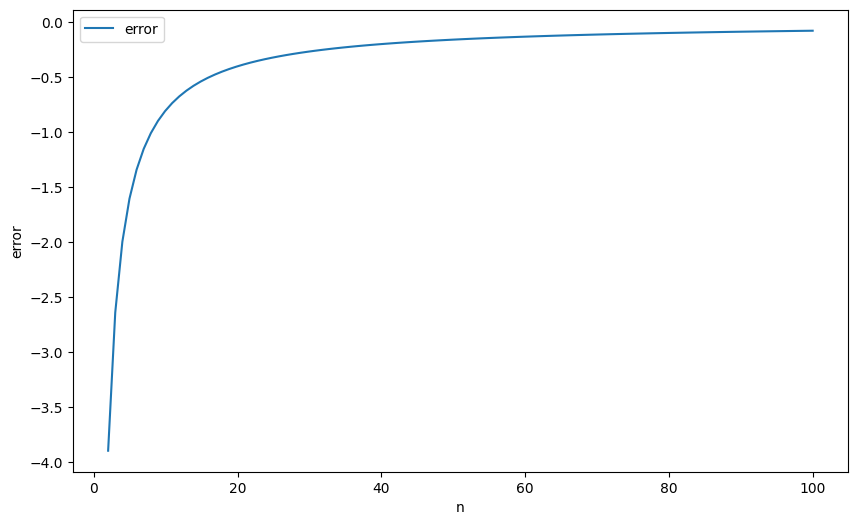

In [6]:
#Show the error as a function of n

x = np.linspace(2,100, 100)


plt.figure(figsize=(10,6))
plt.plot(x, compound_interest(A,r,x)-A*np.exp(r), label='error')
plt.xlabel('n')
plt.ylabel('error')

plt.legend()
plt.show()

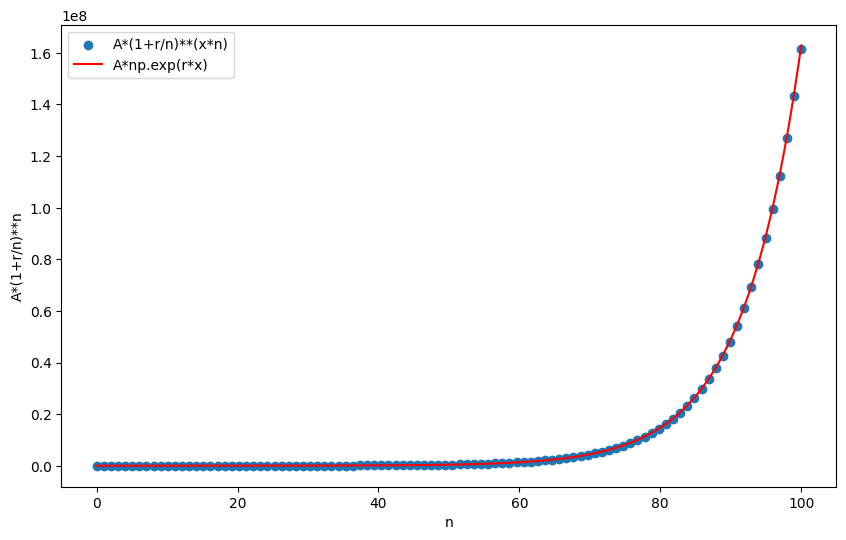

In [9]:

n = 100

x = np.linspace(0, 100, n)
x0 = np.linspace(0, 100, 1000)

plt.figure(figsize=(10,6))

plt.scatter(x, A*(1+r/n)**(x*n), label='A*(1+r/n)**(x*n)')
plt.plot(x0, A*np.exp(r*x0), color='r', label='A*np.exp(r*x)')
plt.xlabel('n')
plt.ylabel('A*(1+r/n)**n')
plt.legend()

plt.show()

## Present Value and Future Value
Since we can save the money in the bank, and it will grow according to the interest rate. Hence, the money received tomorrow will worth less than the same amount of money received today. We introduce the notion of **present value/future value** as a tool to compare the value the money received in different time. 

Suppose the annual interest rate is $r$, and a cash flow $(x_0, x_1,\ldots, x_n)$ where $x_i$ is the amount of money that we will receive or lose in year $n$. Then its **present value**, which the value of this cash flow at year $0$ is given by 
$$PV = x_0 + \frac{x_1}{1+r}+\frac{x_2}{(1+r)^2}+\cdots+\frac{x_n}{(1+r)^n}$$
Its **future value** at year $n$ is given by 
$$FV = x_0(1+r)^n+x_1(1+r)^{n-1}+\cdots+x_n$$

We also call $\frac{1}{1+r}$ as the **discount factor**. This is how the money received in the future will be discounted by. 

In the continuous compound model, the discount factor is $e^{-r}$. Suppose the cash flow we have is $(x_{t_0}, x_{t_1},\ldots, x_{t_n})$ where $x_{t_i}$ is the money received at time $t_i$. Then its present value is given by
$$PV = \sum_0^n x_{t_k}e^{-rt_k}$$

If the present value of two cash flow are the same, then we say that they are **equivalent**. 

In [10]:
import math
def PV(r, cf, continuous_compounding = False, dt = None): 
    ''' cf: The cash flow. It can be a list of cash flows or a single cash flow
        r: The discount rate
        continuous_compounding: If this is set to True, then we will use continous compounding. Otherwise, we will use discrete compounding
        dt: The time at which the cash flow is received. It can be a list of times or a single time. If it is a list, then it should have the same length as cf
    '''
    if dt is None: 
        dt = range(len(cf))
    pv = 0
    if not continuous_compounding:
        for k in range(0, len(cf)):
            pv += cf[k] / (1+r)**dt[k]
    else:
        for k in range(0, len(cf)):
            pv += cf[k] * math.exp(-r * dt[k])
    return pv

# This will return the future value of a cash flow at time T. If T is not specified, then we take T as the time that we receive the last cash flow
def FV(r, cf, continuous_compounding = False, dt = None, T = None):
    ''' cf: The cash flow. It can be a list of cash flows or a single cash flow
        r: The discount rate
        continuous_compounding: If this is set to True, then we will use continous compounding. Otherwise, we will use discrete compounding
        dt: The time at which the cash flow is received. It can be a list of times or a single time. If it is a list, then it should have the same length as cf
        T: The time at which we want to calculate the future value. If it is not specified, then we will take the time of the last cash flow
    '''
    if dt is None: 
        dt = range(len(cf))
    if T is None: 
        T = dt[-1]
    fv = 0
    if not continuous_compounding:
        for k in range(0, len(cf)):
            fv += cf[k] * (1+r)**(T - dt[k])
    else:
        for k in range(0, len(cf)):
            fv += cf[k] * math.exp(r * (T - dt[k]))
    return fv   
    

#### Example in Lecture:
Compute the present value of the cash flow $[-2,1,1, 1]$ with $r = 0.1$, compounded yearly. 

In [11]:
print(f"The present value of the above cash flow is {PV(r = 0.1, cf = [-2,1,1,1]):.2f}")

The present value of the above cash flow is 0.49


In [13]:
print(-2+1/(1+0.1)+1/((1+0.1)**2)+1/((1+0.1)**3))

0.48685199098422216


## Internal rate of return
Usually, there are investments where we need to deposit an amount money first, and then receive money in the future. This corresponds to a cash flow $(x_0,x_1,\ldots, x_n)$ with $x_0 < 0$, and all other $x_i \geq 0$. The **Internal rate of return(IRR)** is a tool to analyze the actual interest paid by this investment. More precisely, the IRR is a number $r$ such that the present value corresponding to this cash flow is $0$. In other words, the cash flow corresponding to investment is the same as the cash flow generated by saving the money $x_0$ in the bank with interest rate $r$ (which has present value $0$). 

 

In [14]:
from scipy.optimize import fsolve
def simple_npv(r, cf):
    '''This function calculates the NPV of a cash flow given a discount rate r'''
    return sum(cf[k]/(1+r)**k for k in range(len(cf)))

# We use the fsolve function to find the root of the simple_npv function. This root is the IRR
def irr(cf): 
    '''This function calculates the IRR of a cash flow'''
    result = fsolve(simple_npv, x0 = 0.1, args = cf)
    #x0: Initial guess for the roots. args: Extra arguments to pass to the function.
    return result[0]


**Example** \
Consider an investment opportunity which requires 10000 as the initial capital, and returns 2000, 3000, 4000, 5000, 6000 at year 1, 2, 3, 4, 5 respectively. Compute the internal rate of return of this investment. 

In [15]:
print(f"The irr of this investment is {irr([-10000,2000,3000,4000,5000,6000]) * 100:.2f}%")

The irr of this investment is 23.29%


### Explanation for IRR.
Usually, we have a lot of different fixed income investment tools. For example, there are annuity, bonds, certificate of deposits(cd) and so on. We wish to have a tool to compute their "interest rate". 

Consider the following example of a coupon paying bonds. Its price is 100, and we will receive 10 in year 1, and in year 2. In year 3, we will get our 100 back along with the 10 dollar coupon. The corresponding cashflow is given by $(-100, 10, 10, 110)$. We can compute that its internal rate of return is


In [16]:
r = irr([-100, 10, 10, 110])
print("The internal rate of return of this bond is", r)

The internal rate of return of this bond is 0.1


The irr being $0.1$ means that instead of spending 100 to buy this bond, we can save this 100 in the bank. If the bank offer an interest rate $0.1$, compounded yearly, then we will receive the same amount of money as purchasing this bond in year 3. So the irr of this bond is really the "interest rate" of this investment tool.

Also, note that the 10 dollar coupon received in year 1 and year 2 will also be saved to bank immediately. Then the amount of money we get from this bond in year 3 is given by 
$$10*1.1^2+10 * 1.1 + 110$$
which is also the future value of the cashflow $(0, 10, 10, 100)$ with interest rate $r = 0.1$.

The amount of money we get in year 3 by saving 100 in the bank with interest rate $r = 0.1$ is given by 
$$100*(1.1)^3$$

We call the following program, and we see that they are the same. Hence $0.1$ is really the "interest rate" of this coupon paying bond.

In [17]:
print(f"The future value of saving 100 in the bank with this interest rate is given by {FV(r, [100], T = 3):.1f}")
print(f"The future value of investing 100 in that investment root is given by {FV(r, [0, 10, 10, 110]):.1f}")

The future value of saving 100 in the bank with this interest rate is given by 133.1
The future value of investing 100 in that investment root is given by 133.1
